**Importamos las librerias**

In [1]:
#!pip install tensorflow
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os
import scipy
import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-09 20:26:33.109870: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 20:26:33.109942: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 20:26:33.121636: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 20:26:34.119246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-09 20:26:37.128855: W tensorflow/compiler/

**Inicializa un cliente de S3**

In [2]:
# Inicializa un cliente de S3
s3 = boto3.client('s3')
# Nombre del bucket
bucket_name = 'mlenprod'


**Cargamos las imagenes de hombres para train y validation**

In [3]:
# Inicializa un cliente de S3
s3 = boto3.client('s3')
# Nombre del bucket
bucket_name = 'mlenprod'

#Prefijo del folder

folder_prefix = 'imagenes/hombres_train/'
hombres_train = [] #creamos la lista con las imagenes hombres_train
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        
        image = Image.open(io.BytesIO(image_data))
        
         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        hombres_train.append(image)

# Convertir las listas de imágenes en arrays de NumPy
hombres_train = np.array([np.asarray(image) for image in hombres_train])

In [4]:
#Prefijo del folder

folder_prefix = 'imagenes/hombres_validation/'
hombres_validation = [] #creamos la lista con las imagenes hombres_validation
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        image = Image.open(io.BytesIO(image_data))

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        hombres_validation.append(image)

# Convertir las listas de imágenes en arrays de NumPy
hombres_validation = np.array([np.asarray(image) for image in hombres_validation])

**Cargamos las imagenes de mujeres para train y validation**

In [5]:
#Prefijo del folder

folder_prefix = 'imagenes/mujeres_train/'
mujeres_train = [] #creamos la lista con las imagenes mujeres_train
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        
        image = Image.open(io.BytesIO(image_data))

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        mujeres_train.append(image)

# Convertir las listas de imágenes en arrays de NumPy
mujeres_train = np.array([np.asarray(image) for image in mujeres_train])

In [6]:
#Prefijo del folder

folder_prefix = 'imagenes/mujeres_validation/'
mujeres_validation = [] #creamos la lista con las imagenes mujeres_validation
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        image = Image.open(io.BytesIO(image_data))

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        mujeres_validation.append(image)

# Convertir las listas de imágenes en arrays de NumPy
mujeres_validation = np.array([np.asarray(image) for image in mujeres_validation])

**Vemos un ejemplo de imagen de hombre y mujer**

(150, 150, 4)


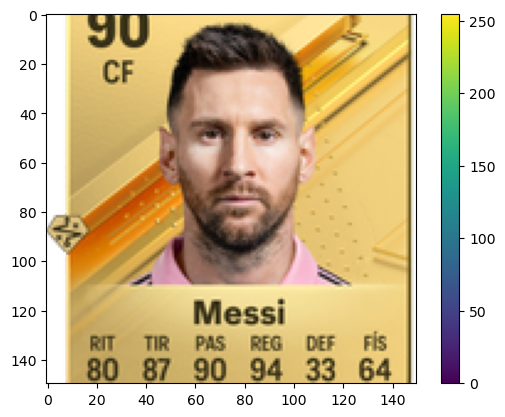

In [7]:
print(hombres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(hombres_train[4]))
plt.colorbar()
plt.grid(False)
plt.show()


(150, 150, 4)


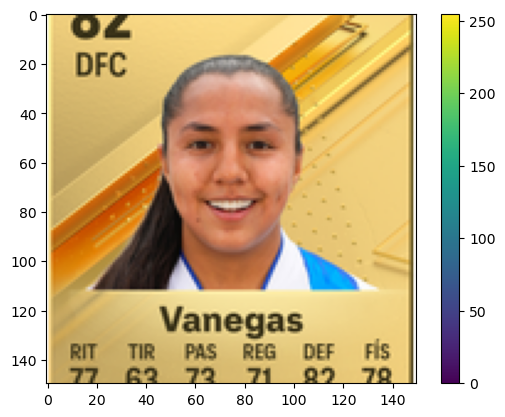

In [8]:
print(mujeres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(mujeres_train[360]))
plt.colorbar()
plt.grid(False)
plt.show()

**Unimos las imagenes de hombres y mujeres para train y validation**

In [9]:
#IMAGENES TRAIN
imagenes_train = np.concatenate([hombres_train,mujeres_train])
print(len(imagenes_train)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_train = np.array(imagenes_train)
print(Imagenes_train.shape)

#IMAGENES VALIDATION
imagenes_validation = np.concatenate([hombres_validation,mujeres_validation])
print(len(imagenes_validation)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_validation = np.array(imagenes_validation)
print(Imagenes_validation.shape)

741
(741, 150, 150, 4)
148
(148, 150, 150, 4)


**Cargamos las etiquetas de hombres para train y validation**

In [10]:
etiquetas_hombres_train = np.repeat(0,380)
print(len(etiquetas_hombres_train))
print(etiquetas_hombres_train)

etiquetas_hombres_validation = np.repeat(0,84)
print(len(etiquetas_hombres_validation))
print(etiquetas_hombres_validation)


380
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
84
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


**Cargamos las etiquetas de mujeres para train y validation**

In [11]:
etiquetas_mujeres_train = np.repeat(1,361)
print(len(etiquetas_mujeres_train))
print(etiquetas_mujeres_train)

etiquetas_mujeres_validation = np.repeat(1,64)

print(len(etiquetas_mujeres_validation))
print(etiquetas_mujeres_validation)


361
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
class_names = ['HOMBRE','MUJER']
print(class_names)

['HOMBRE', 'MUJER']


**Unimos las etiquetas de hombres y mujeres para train y validation**

In [13]:
#ETIQUETAS ENTRENAMIENTO
labels_train = np.concatenate([etiquetas_hombres_train,etiquetas_mujeres_train])
print(len(labels_train))
print(labels_train)
Labels_train = np.array(labels_train)
print(Labels_train.shape)

#ETIQUETAS VALIDATION
labels_validation = np.concatenate([etiquetas_hombres_validation,etiquetas_mujeres_validation])
print(len(labels_validation))
print(labels_validation)
Labels_validation = np.array(labels_validation)
print(Labels_validation.shape)


741
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

**Ploteamos varias imagenes del dataset final de train**

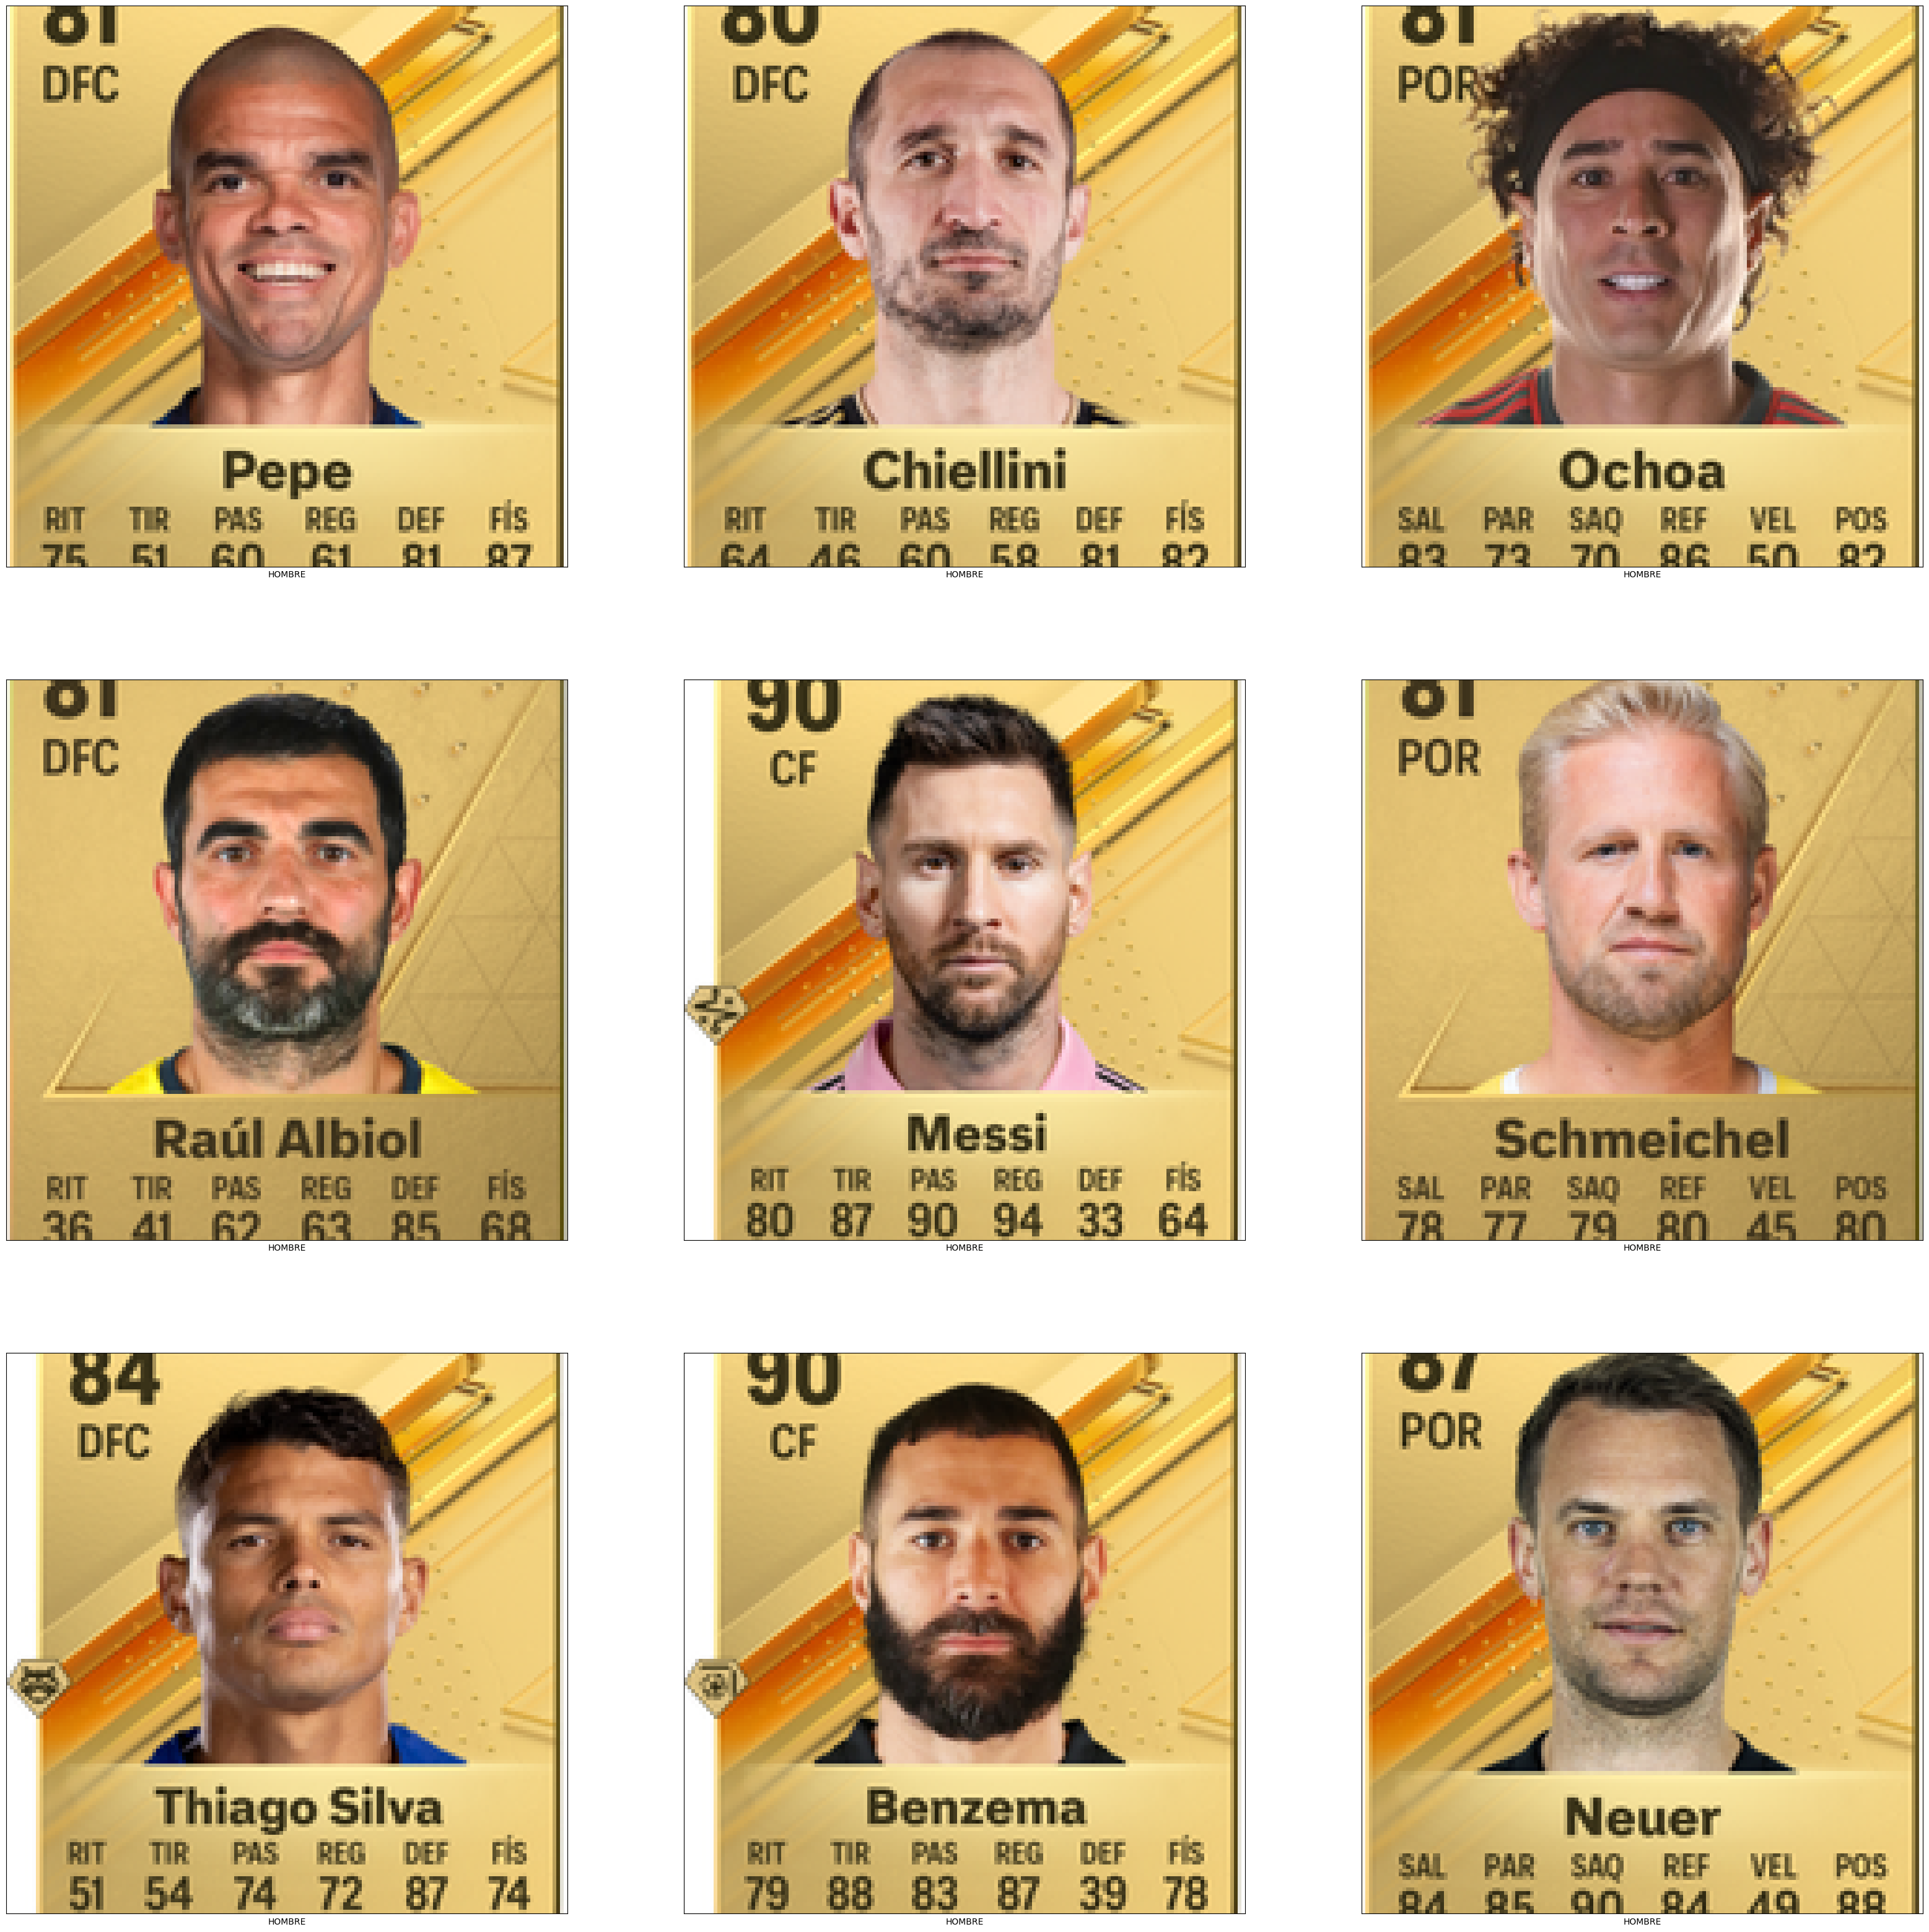

In [14]:
plt.figure(figsize=(40,40))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Imagenes_train[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels_train[i]])
plt.show()

**Modelo**

In [15]:
# CCREAMOS GENERADORES DE DATOS
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(Imagenes_train)

In [ ]:
#SE DEFINE EL MODELO
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

#SE COMPILA EL MODELO
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#SE ENTRENA EL MODELO
history = modelo.fit(datagen.flow(Imagenes_train, Labels_train, batch_size=64), epochs=15, validation_data=(Imagenes_validation, Labels_validation))



2023-11-09 20:28:26.453799: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/15
12/12 [==============================] - 15s 1s/step - loss: 5.0625 - accuracy: 0.6626 - val_loss: 3.6191 - val_accuracy: 0.8446
Epoch 2/15
12/12 [==============================] - 13s 1s/step - loss: 1.3225 - accuracy: 0.7814 - val_loss: 1.9527 - val_accuracy: 0.8311
Epoch 3/15
12/12 [==============================] - 14s 1s/step - loss: 0.8363 - accuracy: 0.8367 - val_loss: 0.7085 - val_accuracy: 0.8514
Epoch 4/15
12/12 [==============================] - 14s 1s/step - loss: 0.4427 - accuracy: 0.8421 - val_loss: 45.8411 - val_accuracy: 0.5676
Epoch 5/15
12/12 [==============================] - 14s 1s/step - loss: 0.3288 - accuracy: 0.8664 - val_loss: 36.7504 - val_accuracy: 0.6554
Epoch 6/15
12/12 [==============================] - 14s 1s/step - loss: 0.3026 - accuracy: 0.8799 - val_loss: 7.7066 - val_accuracy: 0.7162
Epoch 7/15
12/12 [==============================] - 14s 1s/step - loss: 0.3141 - accuracy: 0.8529 - val_loss: 4.2347 - val_accuracy: 0.6824
Epoch 8/15
12/12 [

**Ploteamos las metricas de evaluacion**

In [ ]:
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
modelo.save('conv.h5')

Notas:

Si la loss en train baja y la loss en validation sube = overfitting

**Guardamos el artefacto en S3**

In [ ]:
# Nombre del archivo local y del bucket de S3
local_file_name = 'conv.h5'
s3_bucket_name = 'mlenprod'

# Ruta en S3 donde deseas almacenar el archivo
s3_key = 'artifacts/conv.h5'

# Crea una instancia del cliente S3
s3_client = boto3.client('s3')

# Sube el archivo a S3
s3_client.upload_file(local_file_name, s3_bucket_name, s3_key)

print(f'Archivo {local_file_name} subido exitosamente a {s3_key} en el bucket {s3_bucket_name}.')